# Decision Tree Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<img src="DecisionTree.svg">

## Kfold 

In [86]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print('Mean estimated accuracy : {}'.format(results.mean()))

Mean estimated accuracy : 0.6886876281613123


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [87]:
results

array([0.61038961, 0.77922078, 0.68831169, 0.5974026 , 0.7012987 ,
       0.68831169, 0.77922078, 0.75324675, 0.64473684, 0.64473684])

## Classification Report

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       162
         1.0       0.61      0.55      0.58        92

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.70      0.71      0.71       254



In [69]:
accuracy = model.score(X_test,Y_test)
print("Accuracy : {}".format(accuracy))

Accuracy : 0.7086614173228346


## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[129  33]
 [ 41  51]]


In [88]:
accuracy = (129+51)/(129 + 33 + 41 + 51)
print("Accuracy : {}".format(accuracy))

Accuracy : 0.7086614173228346


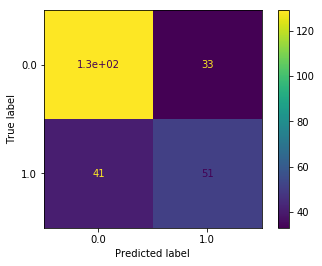

In [72]:
plot_confusion_matrix(model, X_test, Y_test)

## Tree Visualization

[Text(172.627,217.426,'X[1] <= 127.5\ngini = 0.45\nsamples = 514\nvalue = [338, 176]'),
 Text(94.7881,203.399,'X[7] <= 28.5\ngini = 0.308\nsamples = 332\nvalue = [269, 63]'),
 Text(35.8174,189.371,'X[5] <= 30.95\ngini = 0.152\nsamples = 193\nvalue = [177, 16]'),
 Text(12.2802,175.344,'X[0] <= 7.5\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(8.18683,161.316,'X[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(4.09341,147.289,'gini = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(12.2802,147.289,'X[6] <= 0.713\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(8.18683,133.261,'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(16.3737,133.261,'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(16.3737,161.316,'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(59.3545,175.344,'X[6] <= 0.892\ngini = 0.273\nsamples = 86\nvalue = [72, 14]'),
 Text(45.0275,161.316,'X[3] <= 8.0\ngini = 0.235\nsamples = 81\nvalue = [70, 11]'),
 Text(28.6539,147.289,'X[1] <= 110.0\ngini

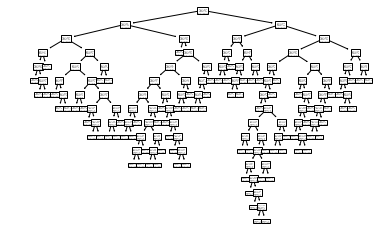

In [73]:
from sklearn import tree
tree.plot_tree(model) 

In [82]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("pima") 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


'pima.pdf'

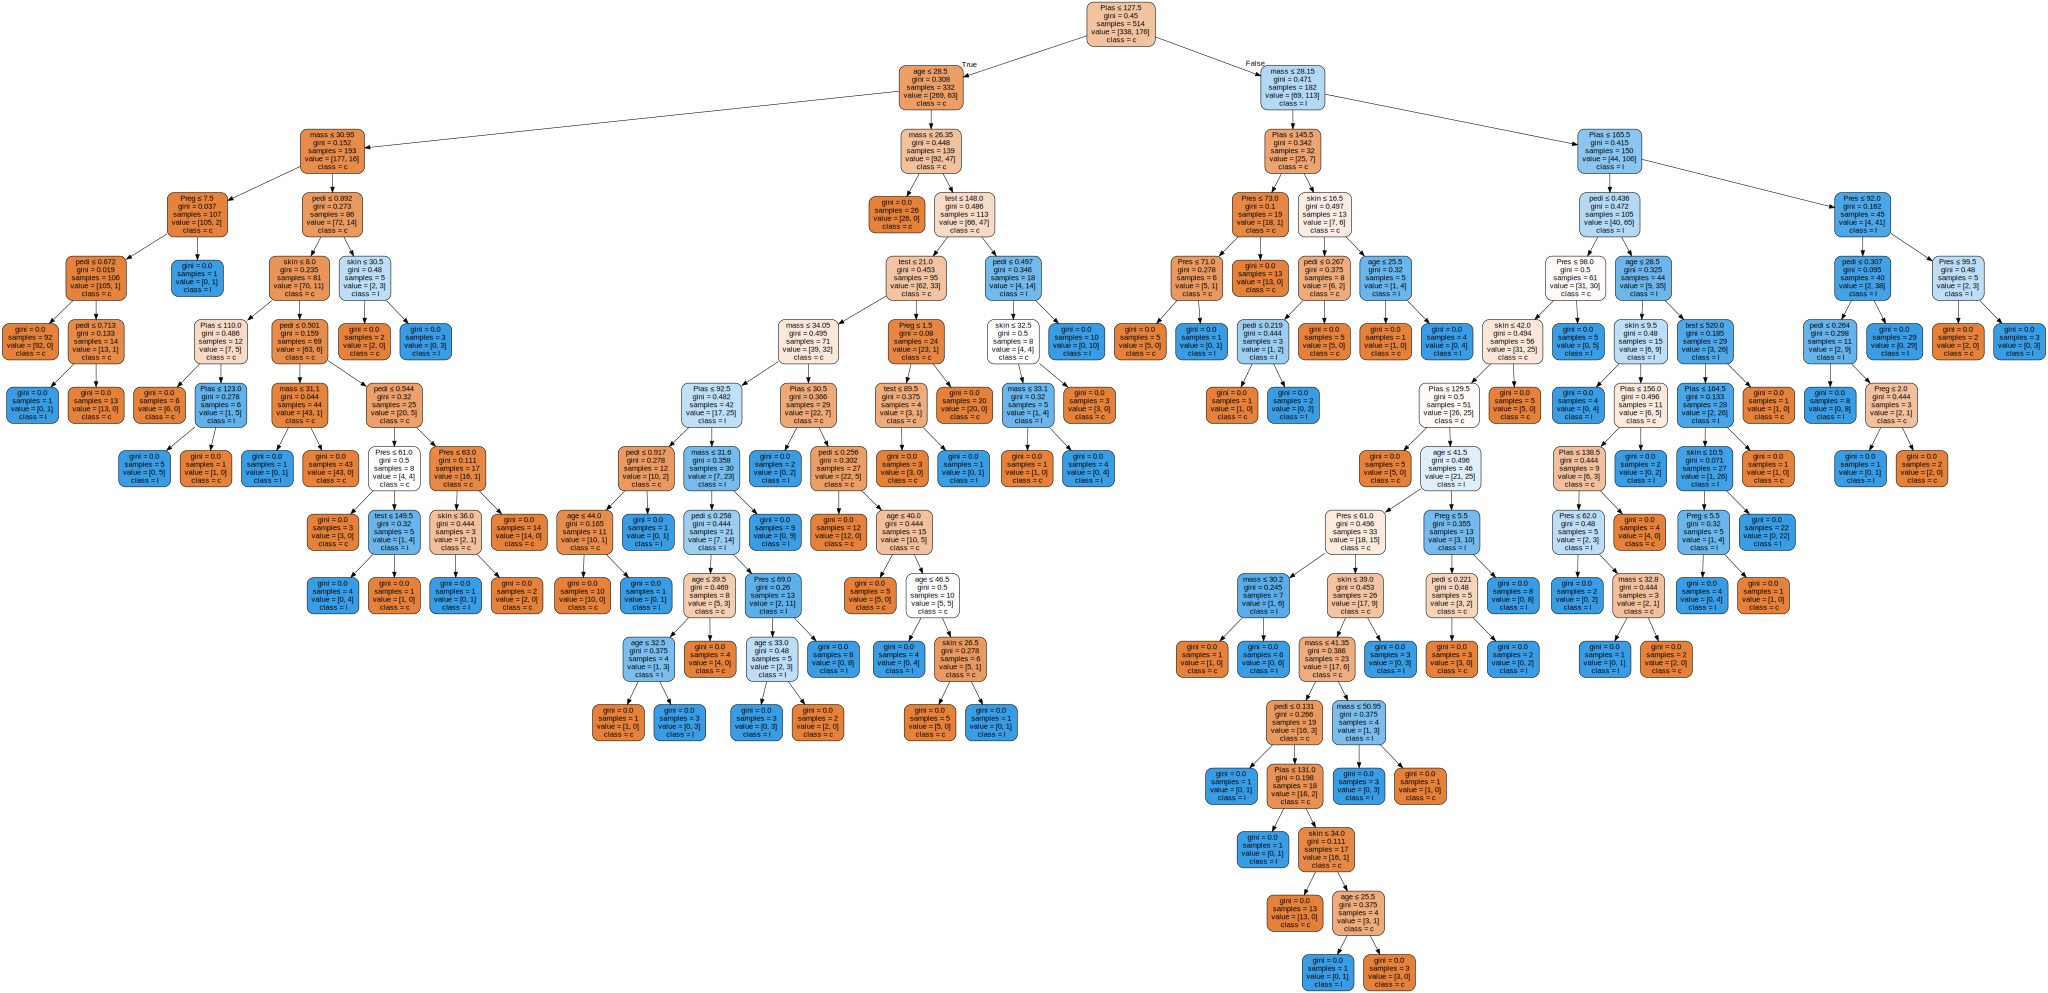

In [85]:
dot_data = tree.export_graphviz(model, out_file=None,   
                     feature_names=dataframe.columns[:-1],  
                     class_names=dataframe.columns[-1],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("pima_color")
graph

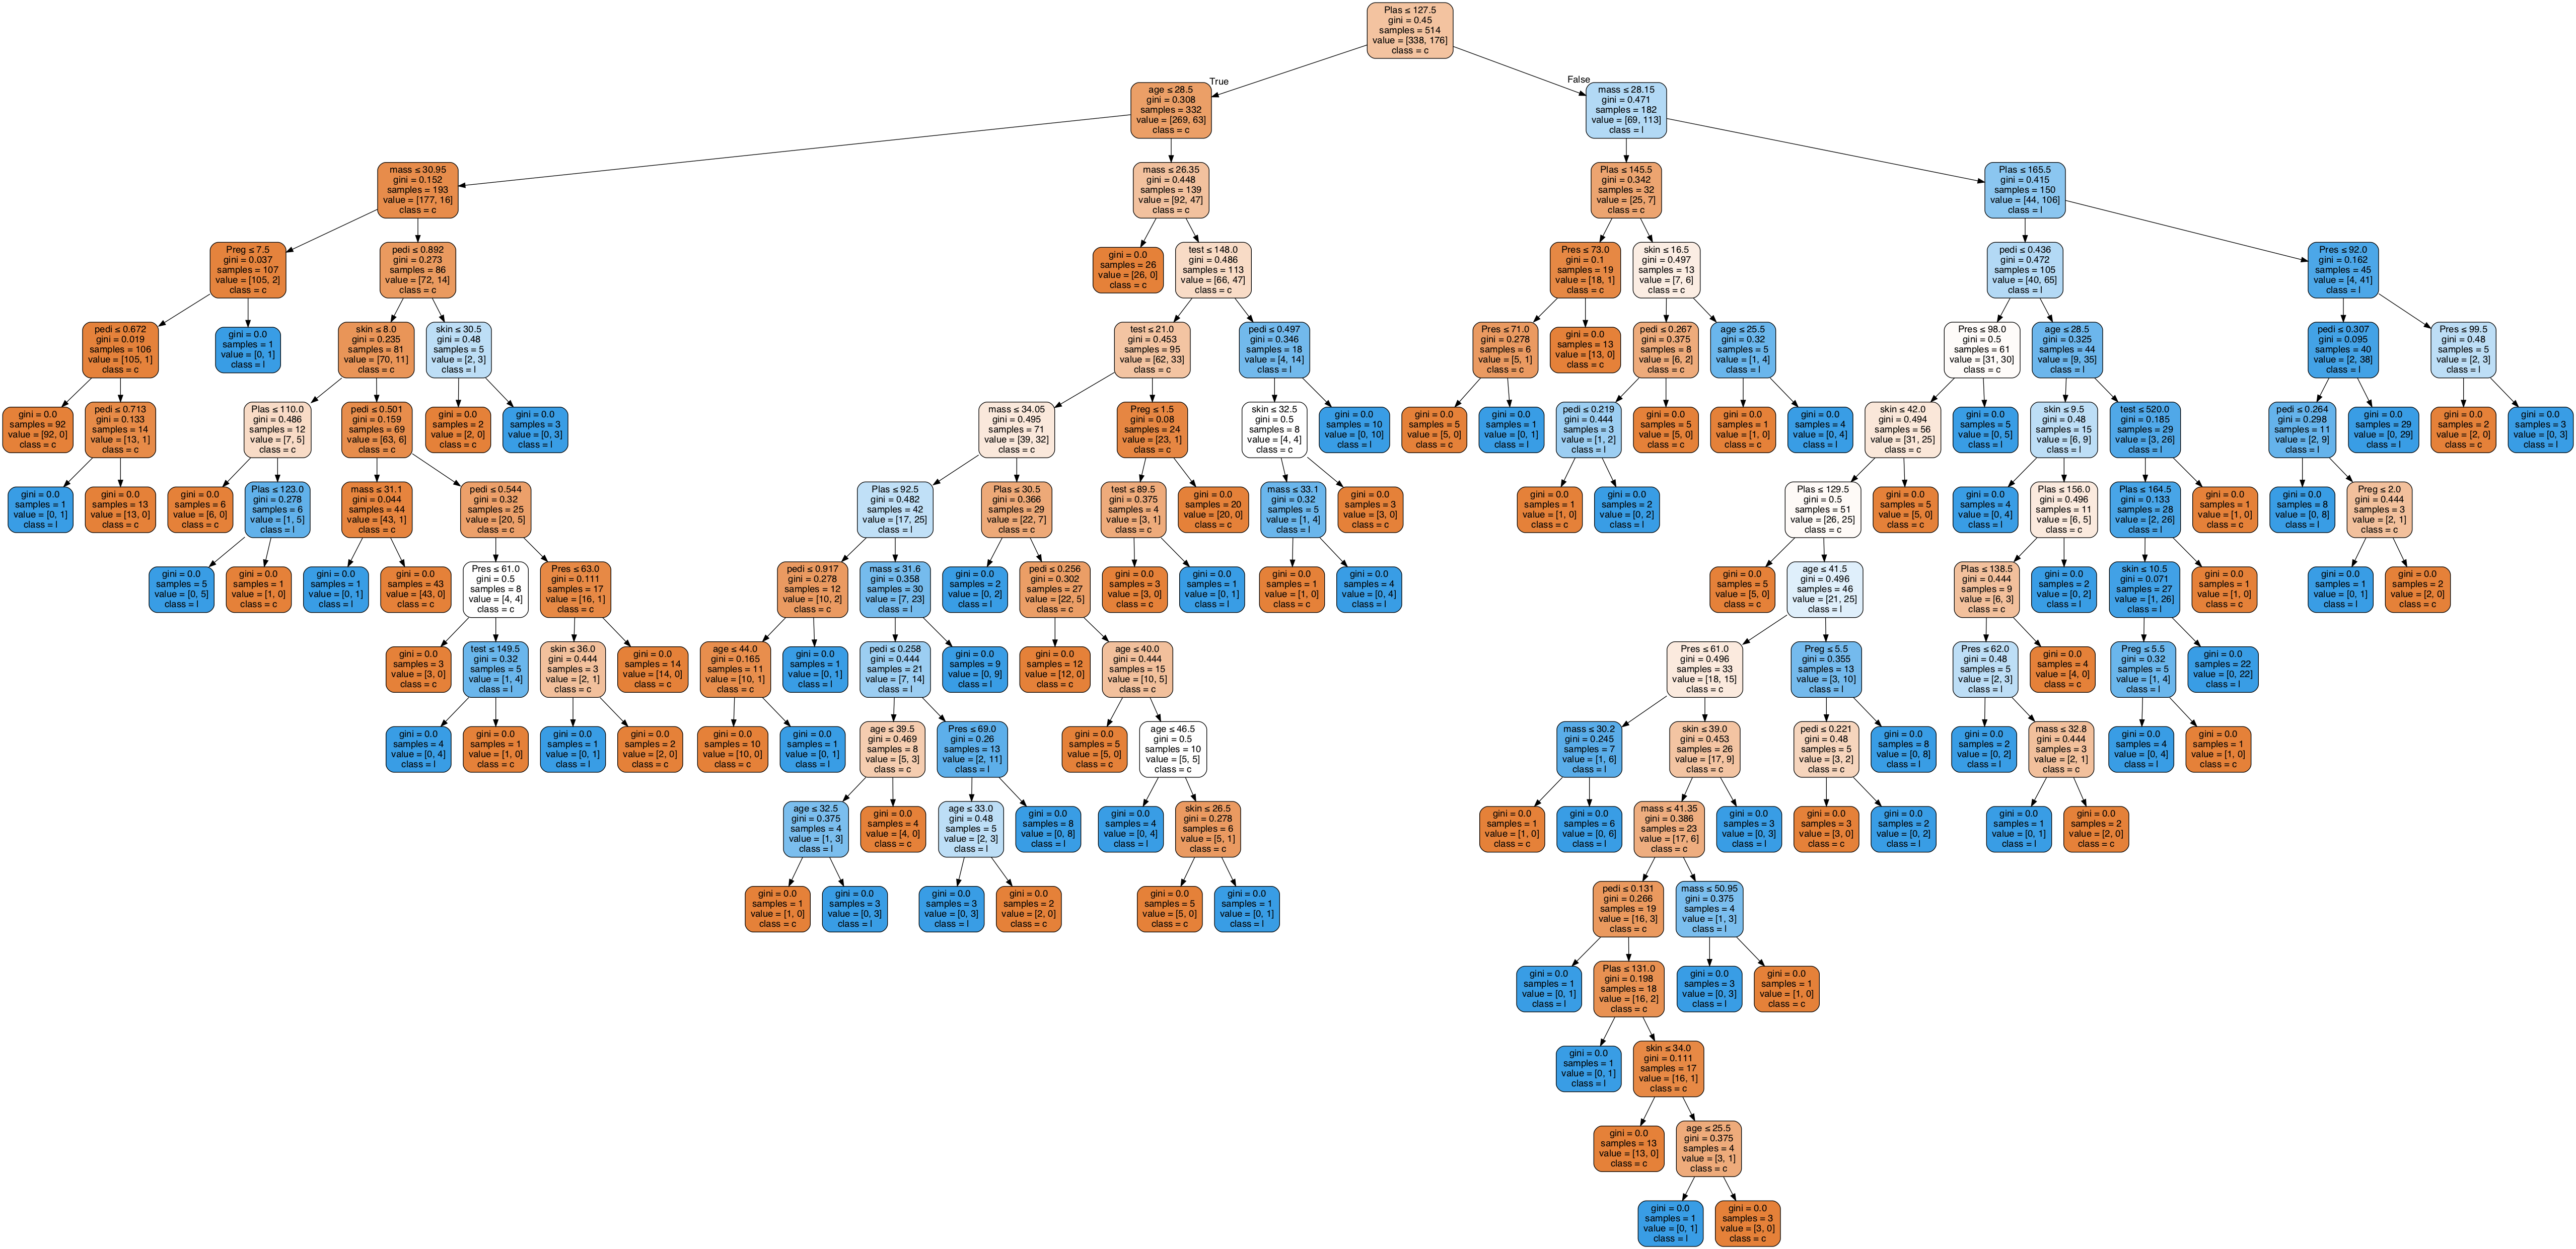

In [84]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = dataframe.columns[:-1],class_names=dataframe.columns[-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('pima_color.png')
Image(graph.create_png())

# Decision Tree Regressor 

In [37]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'housing.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:12]
Y = array[:,12]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('Mean squared error : {}'.format(results.mean()))

Mean squared error : -39.930299215686276


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
